## 1. Importando os dados coletados

In [4]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/mathmeza/calculadora-de-imoveis/main/coleta_de_dados/dados_mercado_livre.csv')

In [5]:
df.head()

,zona,area,preco,quartos
0,sul,300.0,10900,NaN
1,sul,250.0,4500,NaN
2,sul,130.0,2800,3.0
3,sul,135.0,4500,3.0
4,sul,300.0,12000,3.0


In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
area,703.0,165.411095,157.753966,1.0,60.0,113.0,214.5,1423.0
preco,720.0,4590.729167,8463.334335,250.0,1100.0,2200.0,5200.0,150000.0
quartos,638.0,2.446708,1.529248,1.0,1.0,2.0,3.0,17.0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 720 entries, 0 to 719
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   zona     720 non-null    object 
 1   area     703 non-null    float64
 2   preco    720 non-null    int64  
 3   quartos  638 non-null    float64
dtypes: float64(2), int64(1), object(1)
memory usage: 22.6+ KB


In [8]:
df['preco'] = df['preco'].astype('float')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 720 entries, 0 to 719
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   zona     720 non-null    object 
 1   area     703 non-null    float64
 2   preco    720 non-null    float64
 3   quartos  638 non-null    float64
dtypes: float64(3), object(1)
memory usage: 22.6+ KB


## 2. Fazendo a análise exploratória e o preprocessamento dos dados

In [10]:
from sklearn.model_selection import train_test_split

treino, teste = train_test_split(df, stratify=df['zona'],
                                 test_size=0.25, random_state=0)

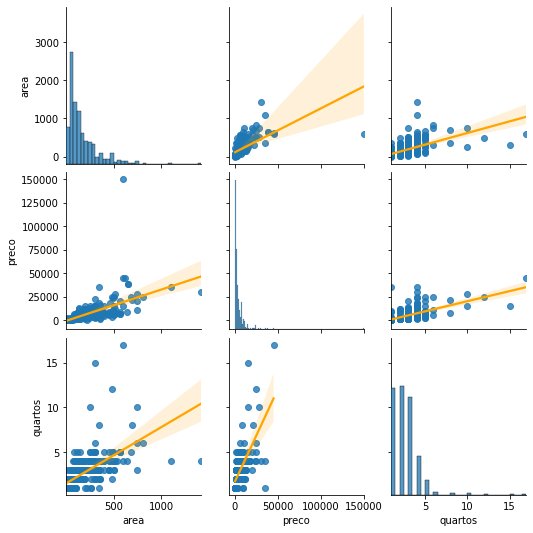

In [11]:
import seaborn as sns

sns.pairplot(treino, kind='reg', plot_kws={'line_kws':{'color':'orange'}});

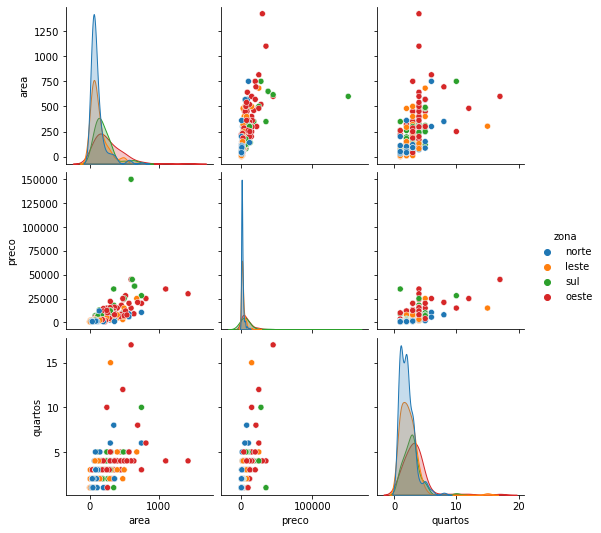

In [12]:
sns.pairplot(treino, hue='zona');

### 2.1 Tratando os dados numéricos




In [13]:
num_cols = ['quartos', 'area', 'preco']
treino_num = treino[num_cols]

In [14]:
treino_num.head()

,quartos,area,preco
172,3.0,240.0,4000.0
455,3.0,130.0,2700.0
235,2.0,150.0,3500.0
331,2.0,90.0,1300.0
403,2.0,75.0,1700.0


In [15]:
treino.isnull().sum()

zona        0
area       14
preco       0
quartos    60
dtype: int64

In [16]:
# preenchendo valores faltantes com a mediana

treino_medianas = treino_num.median()

treino_num = treino_num.fillna(treino_medianas)
treino_num.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 540 entries, 172 to 196
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   quartos  540 non-null    float64
 1   area     540 non-null    float64
 2   preco    540 non-null    float64
dtypes: float64(3)
memory usage: 16.9 KB


In [17]:
treino_num.isnull().sum()

quartos    0
area       0
preco      0
dtype: int64

In [18]:
import numpy as np

# aplicando log1p nos dados numéricos
treino_num = treino_num.apply(np.log1p)

In [19]:
treino_num

,quartos,area,preco
172,1.386294,5.484797,8.294300
455,1.386294,4.875197,7.901377
235,1.098612,5.017280,8.160804
331,1.098612,4.510860,7.170888
403,1.098612,4.330733,7.438972
...,...,...,...
272,1.098612,4.025352,6.908755
315,0.693147,3.931826,6.478510
700,1.609438,5.891644,8.987322
169,1.386294,4.510860,7.170888


In [20]:
treino_num.describe().T

,count,mean,std,min,25%,50%,75%,max
quartos,540.0,1.156746,0.358635,0.693147,0.693147,1.098612,1.386294,2.890372
area,540.0,4.721591,0.893431,0.693147,4.025352,4.709530,5.307009,7.261225
preco,540.0,7.810794,1.023507,5.525453,7.003974,7.696667,8.612685,11.918397


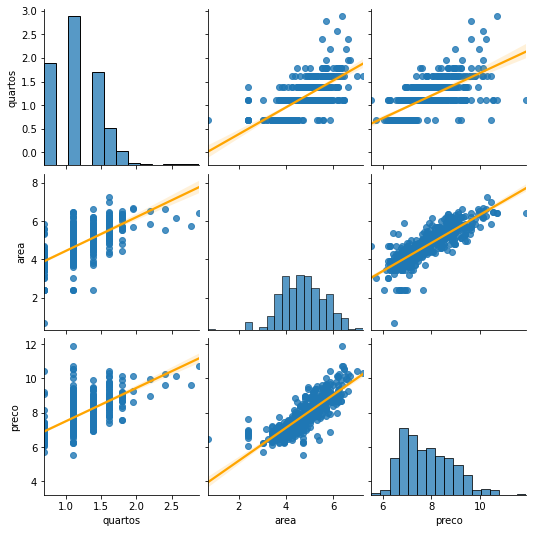

In [21]:
sns.pairplot(treino_num, kind='reg', plot_kws={'line_kws':{'color':'orange'}});

In [22]:
# fazendo ou não a remoção de outliers com IQR

REMOVER_OUTLIERS = False

quartis = treino_num.quantile([0.25, 0.5, 0.75])

Q1 = quartis.loc[0.25]
Q3 = quartis.loc[0.75]
IQR = Q3-Q1

k = 1.5 
limite_inferior = Q1-k*IQR
limite_superior = Q1+k*IQR

treino_num_sem_outlier = treino_num[treino_num>=limite_inferior].dropna()
treino_num_sem_outlier = treino_num_sem_outlier[treino_num_sem_outlier<=limite_superior].dropna()

if REMOVER_OUTLIERS:
    treino = treino.loc[treino_num_sem_outlier.index]

treino_num_sem_outlier

,quartos,area,preco
172,1.386294,5.484797,8.294300
455,1.386294,4.875197,7.901377
235,1.098612,5.017280,8.160804
331,1.098612,4.510860,7.170888
403,1.098612,4.330733,7.438972
...,...,...,...
272,1.098612,4.025352,6.908755
315,0.693147,3.931826,6.478510
700,1.609438,5.891644,8.987322
169,1.386294,4.510860,7.170888


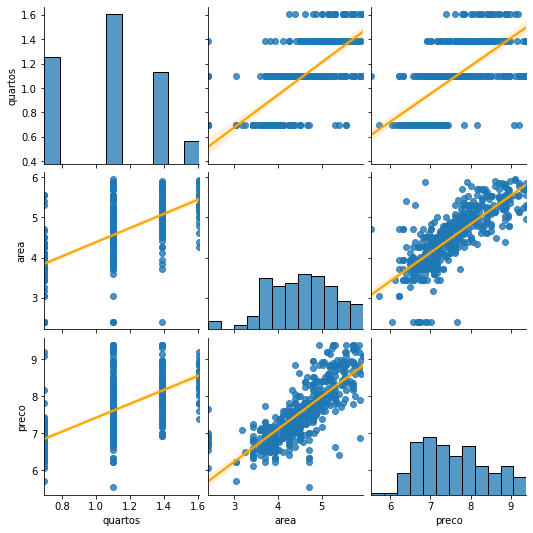

In [23]:
sns.pairplot(treino_num_sem_outlier, kind='reg', plot_kws={'line_kws':{'color':'orange'}});

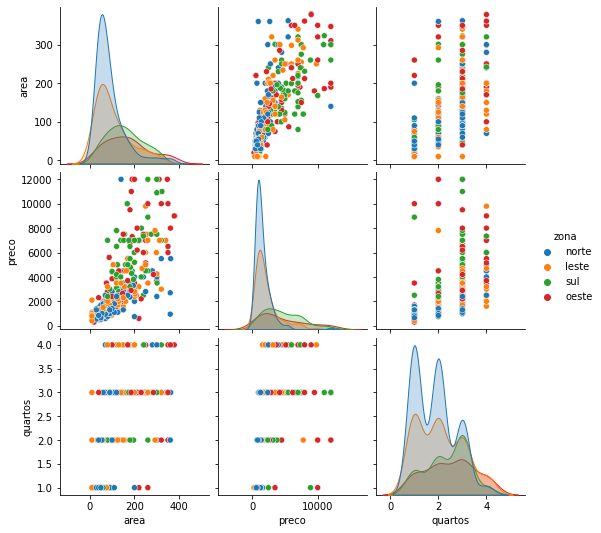

In [24]:
sns.pairplot(treino.loc[treino_num_sem_outlier.index], hue='zona');

### 2.2 Tratando colunas categóricas

In [25]:
cat_cols = ['zona']
treino_cat = treino[cat_cols]

In [26]:
# usando one hot encoding
treino_cat = pd.get_dummies(treino_cat)

In [27]:
treino = pd.concat([treino_cat, treino_num], axis=1)

In [28]:
treino.head()

,zona_leste,zona_norte,zona_oeste,zona_sul,quartos,area,preco
172,0,1,0,0,1.386294,5.484797,8.294300
455,1,0,0,0,1.386294,4.875197,7.901377
235,0,1,0,0,1.098612,5.017280,8.160804
331,0,1,0,0,1.098612,4.510860,7.170888
403,1,0,0,0,1.098612,4.330733,7.438972


### 2.3 Repetindo o preprocessamentos para o conjunto de testes

In [29]:
# Preenchendo valores faltantes com medianas 

# Importante: NUNCA usar informações do conjunto de testes, por isso estamos usando as medianas do conjunto de treino
teste = teste.fillna(treino_medianas)
teste.head()

,zona,area,preco,quartos
641,oeste,110.0,1840.0,2.0
379,norte,280.0,6700.0,4.0
153,norte,40.0,800.0,1.0
650,oeste,100.0,2000.0,2.0
688,oeste,300.0,26000.0,5.0


In [30]:
# aplicando log1p nos valores numericos
teste[num_cols] = teste[num_cols].apply(np.log1p)
teste.head()

,zona,area,preco,quartos
641,oeste,4.709530,7.518064,1.098612
379,norte,5.638355,8.810012,1.609438
153,norte,3.713572,6.685861,0.693147
650,oeste,4.615121,7.601402,1.098612
688,oeste,5.707110,10.165890,1.791759


In [31]:
# fazendo one hot encoding

teste_onehot = pd.get_dummies(teste[cat_cols])
teste=pd.concat([teste_onehot, teste[num_cols]], axis=1)
teste.head()

,zona_leste,zona_norte,zona_oeste,zona_sul,quartos,area,preco
641,0,0,1,0,1.098612,4.709530,7.518064
379,0,1,0,0,1.609438,5.638355,8.810012
153,0,1,0,0,0.693147,3.713572,6.685861
650,0,0,1,0,1.098612,4.615121,7.601402
688,0,0,1,0,1.791759,5.707110,10.165890


### 2.4 Salvando arquivos de treino e teste preprocessados

In [32]:
treino.to_csv('treino_preprocessado.csv', index=False)

In [33]:
teste.to_csv('teste_preprocessado.csv', index=False)